EXP 2 LOGISTIC REGRESSION


In [1]:
import pandas as pd

df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df.dropna(inplace=True)
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,False,True,False,False,True
1,1,38.0,True,False,True,False,False
2,1,26.0,True,False,False,False,True
3,1,35.0,True,False,True,False,False
4,0,35.0,False,True,False,False,True


In [4]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [6]:
model.score(x_test, y_test)

0.8321678321678322

In [7]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

0.7857480547621394

In [8]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
confusion_matrix(y_test, y_predicted)

array([[78,  7],
       [17, 41]], dtype=int64)

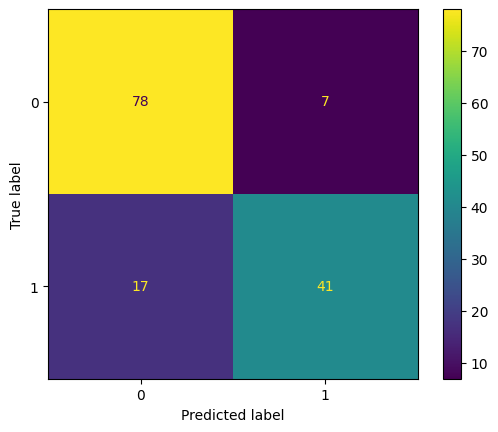

In [9]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        85
           1       0.85      0.71      0.77        58

    accuracy                           0.83       143
   macro avg       0.84      0.81      0.82       143
weighted avg       0.83      0.83      0.83       143



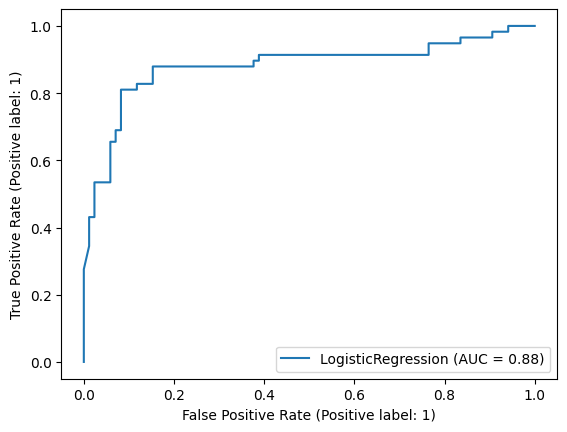

In [11]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, x_test, y_test)

In [12]:
female = [[30, 1, 0, 1, 0, 0]]
model.predict(female)[0]

c:\Users\Pranj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [13]:
male = [[60, 0, 1, 0, 0, 1]]
probability = model.predict_proba(male)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 2.9%


c:\Users\Pranj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [14]:
probability = model.predict_proba(female)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 91.6%


c:\Users\Pranj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


EXP 4 RANDOM FOREST


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv('adult.csv')
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [18]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain', 'capital-loss','hours-per-week', 'native-country', 'income']
df.replace(' ?', pd.NA, inplace=True)
df.dropna(inplace=True)


In [26]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain', 'capital-loss','hours-per-week', 'native-country', 'income']
df.replace(' ?', pd.NA, inplace=True)
df.dropna(inplace=True)
categorical_columns = ['workclass', 'education', 'marital-status','occupation','relationship', 'race', 'sex', 'native-country', 'income']
label_encoders = {}
for col in categorical_columns:
  le = LabelEncoder()
df[col] = le.fit_transform(df[col])
label_encoders[col] = le
print(df)


       age workclass  fnlwgt     education  education-num      marital-status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

In [29]:

X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image, display
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ClassificationReport:\n{classification_report(y_test,y_pred)}")


Accuracy: 0.8484569322892677
ClassificationReport:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4976
           1       0.71      0.61      0.65      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



EXP 6 HIERARCHICAL CLUSTERING


In [15]:
#Hierarchical Clustering, ,
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [16]:
data = pd.read_csv('Wholesale customers data.csv')
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [17]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
print(data_scaled.head())

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1  0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   
2  0.000125  0.000187  0.396552  0.549792  0.479632  0.150119   
3  0.000065  0.000194  0.856837  0.077254  0.272650  0.413659   
4  0.000079  0.000119  0.895416  0.214203  0.284997  0.155010   

   Detergents_Paper  Delicassen  
0          0.149505    0.074809  
1          0.206342    0.111286  
2          0.219467    0.489619  
3          0.032749    0.115494  
4          0.070358    0.205294  


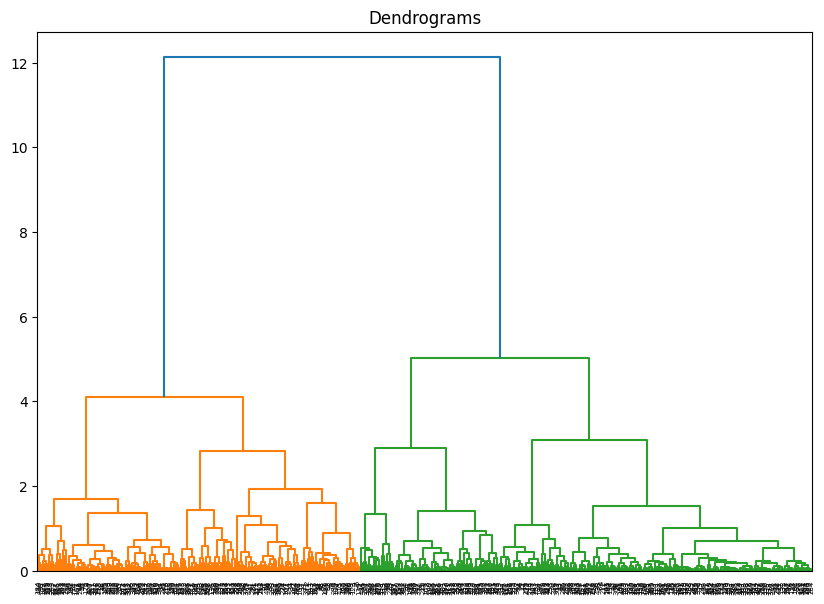

In [18]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
d = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

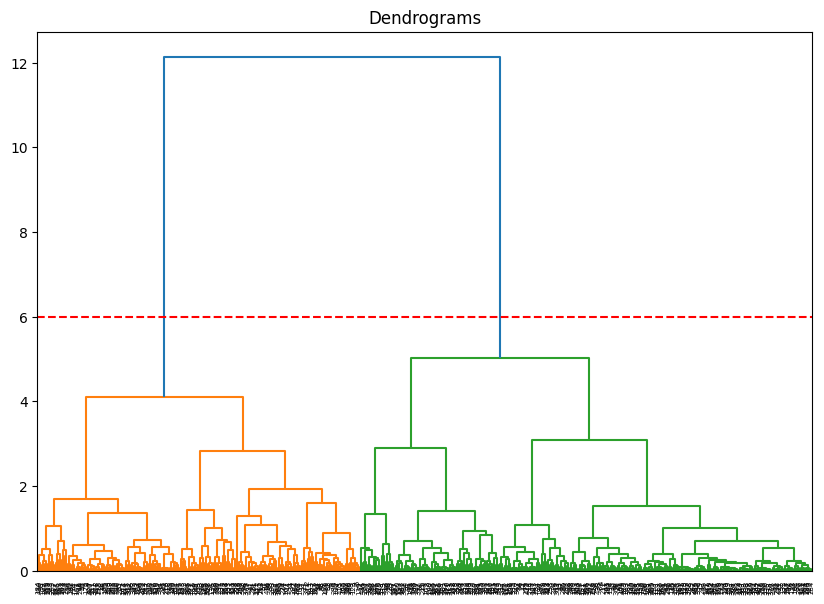

In [19]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
d = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [20]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
print(cluster.fit_predict(data_scaled))

[1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1]


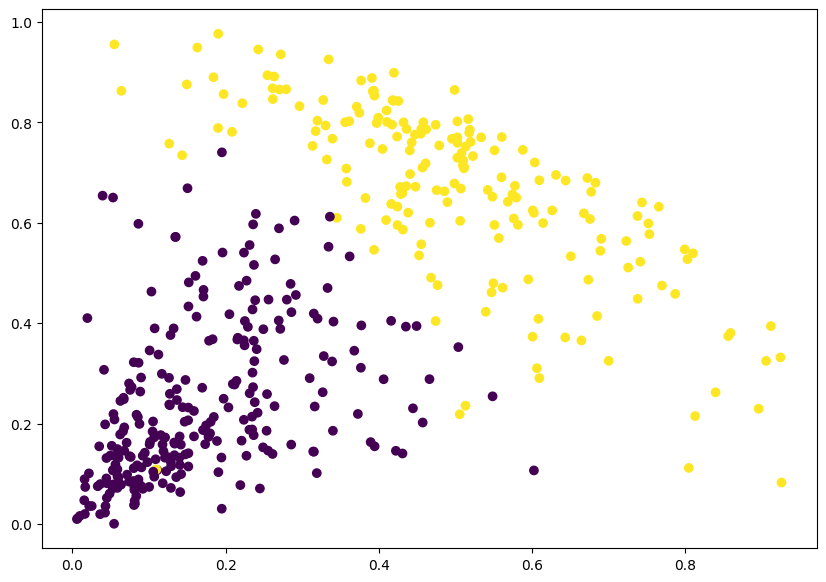

In [21]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

EXP 1 LINEAR REGRESSION

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [41]:
Boston=pd.read_csv('BostonHousing.csv')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [42]:
Boston.info()
Boston.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [43]:
missing_values = Boston.isna().sum()
print(missing_values)


crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [44]:
na_columns = ['rm']
Boston[na_columns] = Boston[na_columns].fillna(Boston.mean())
print(Boston)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [45]:
target = Boston['medv']
print(target)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


<ipython-input-51-8232b7c0adec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Boston['medv'], bins=30)


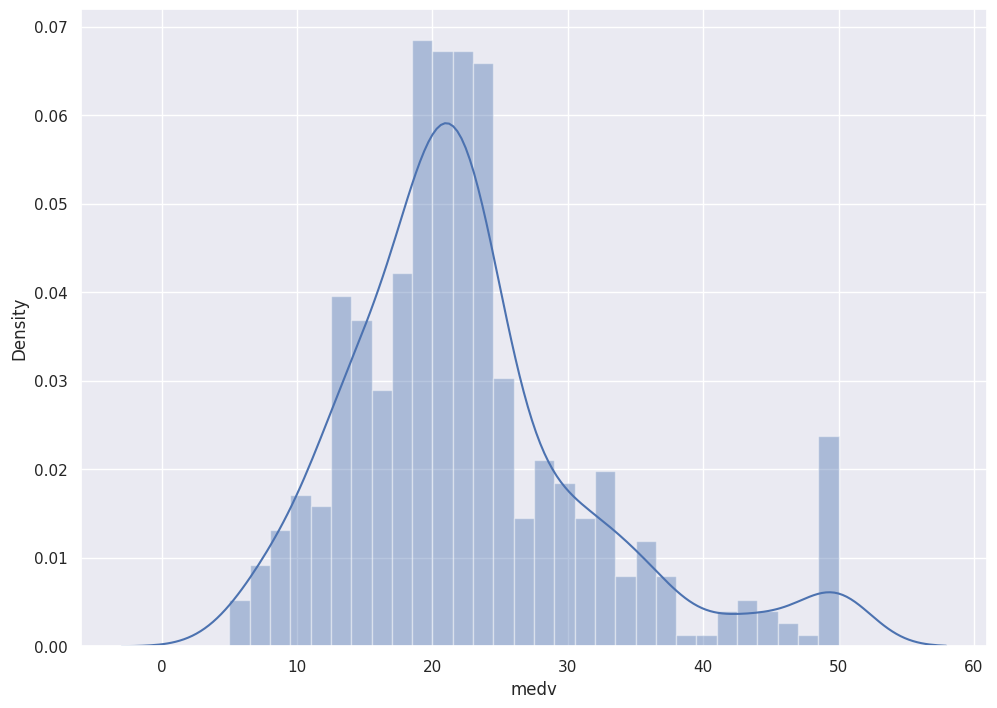

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Boston['medv'], bins=30)
plt.show()

<Axes: >

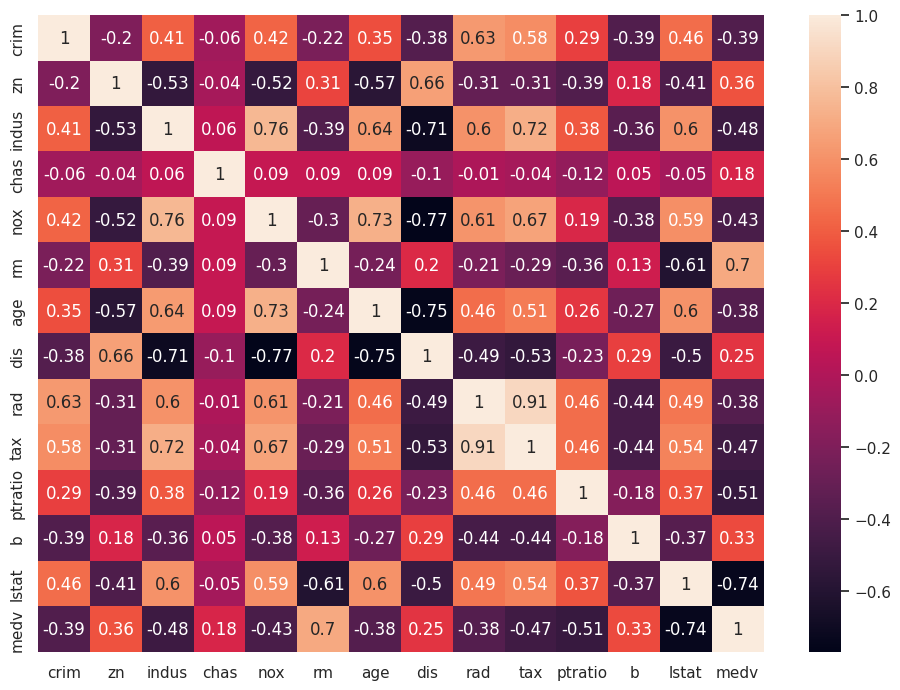

In [52]:
correlation_matrix = Boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

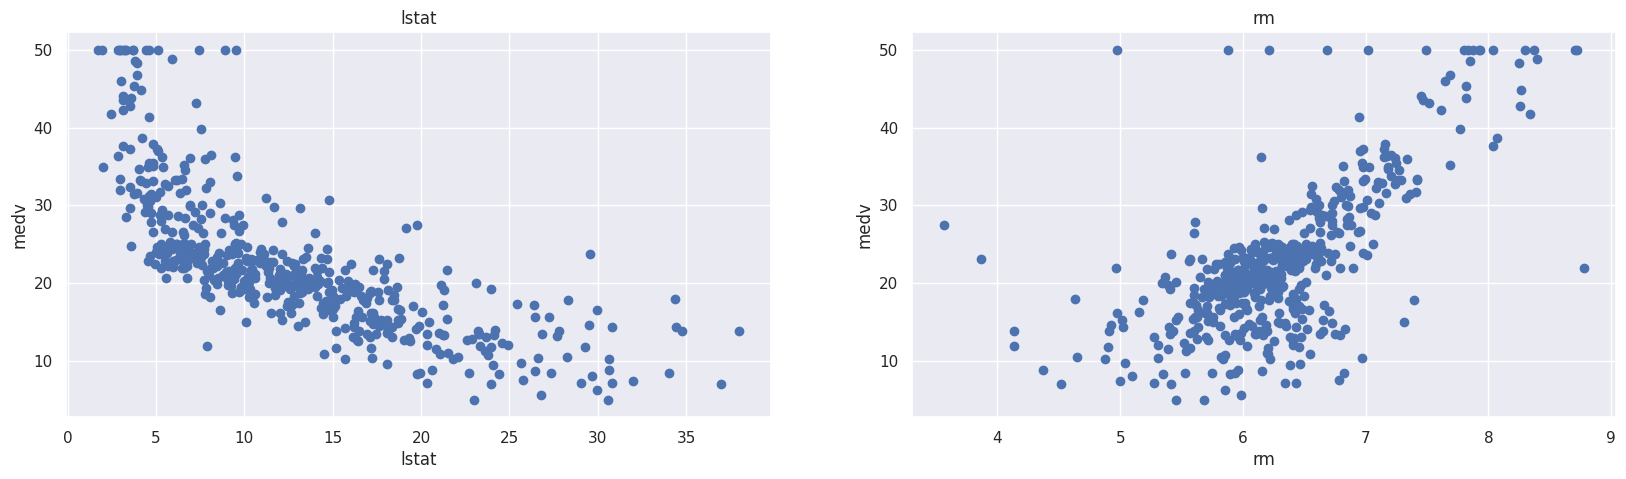

In [55]:

plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = Boston['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = Boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

In [57]:
X = pd.DataFrame(np.c_[Boston['lstat'], Boston['rm']], columns = ['lstat','rm'])
Y = Boston['medv']


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [60]:

# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.639679501707587
R2 score is 0.6297397399231852


The model performance for testing set
--------------------------------------
RMSE is 5.13727583639393
R2 score is 0.6629160947601445


EXP 7 DIMENSIONALITY REDUCTION

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [40]:
df = pd.read_csv('adult.csv', header=None)

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
           'marital.status', 'occupation', 'relationship', 'race',
           'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
           'native.country', 'income']
df.columns = columns
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32558,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32560,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [41]:
# Handle missing values (if any) - removing or filling them

df = df.replace(' ?', np.nan)
df.dropna(inplace=True)

In [42]:
# Encode categorical features
label_encoders = {}
for column in ['workclass', 'education', 'marital.status', 'occupation',
               'relationship', 'race', 'sex', 'native.country', 'income']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,age,9,fnlwgt,16,education.num,7,15,6,5,2,capital.gain,capital.loss,hours.per.week,42,2
1,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
2,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
3,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
4,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
32558,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32559,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32560,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [43]:
df = df.drop(index=1)

# Reset the index if you want a continuous index after dropping
df.reset_index(drop=True, inplace=True)
print(df)

       age  workclass  fnlwgt  education  education.num  marital.status  \
0      age          9  fnlwgt         16  education.num               7   
1       82          4  132870         11              9               6   
2       66          0  186061         15             10               6   
3       54          4  140359          5              4               0   
4       41          4  264663         15             10               5   
...    ...        ...     ...        ...            ...             ...   
32556   22          4  310152         15             10               4   
32557   27          4  257302          7             12               2   
32558   40          4  154374         11              9               2   
32559   58          4  151910         11              9               6   
32560   22          4  201490         11              9               4   

       occupation  relationship  race  sex  capital.gain  capital.loss  \
0              15        

In [44]:
X = df.drop('income', axis=1)
y = df['income']

In [45]:
print(X.dtypes)

age               object
workclass          int64
fnlwgt            object
education          int64
education.num     object
marital.status     int64
occupation         int64
relationship       int64
race               int64
sex                int64
capital.gain      object
capital.loss      object
hours.per.week    object
native.country     int64
dtype: object


In [46]:
imputer = SimpleImputer(strategy='mean')
X_imputer = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputer)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'age'

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [28]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

ValueError: could not convert string to float: 'age'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [29]:
y_pred = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

EXP 5 BOOSTING ALGORITHM

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
df = pd.read_csv('adult.csv')
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [53]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
           'marital.status', 'occupation', 'relationship', 'race',
           'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
           'native.country', 'income']
df.columns = columns

In [54]:
df = df.replace(' ?', np.nan)
df.dropna(inplace=True)

In [55]:
label_encoders = {}
for column in ['workclass', 'education', 'marital.status', 'occupation',
               'relationship', 'race', 'sex', 'native.country', 'income']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [56]:
X = df.drop('income', axis=1)
y = df['income']

In [57]:
def bootstrap_evaluate(X,y,n_boootstrap=100):
  accuracies=[]
  for i in range(n_bootstraps):
    indices = np.random.randint(0,len(X),len(X))

    bootstrap_X, bootstrap_y = X.iloc[indices],y.iloc[indices],y.iloc[indices]

    x_train, x_test, y_train, y_test = train_test_split(bootstrap_X, bootstrap_y, test_size=0.2, random_state=42)

    rf = RandomForestClassifier(n_estimators=100, random_state= 42)

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

  mean_accuracy = np.mean(accuracies)
  std_accuracy = np.std(accuracies)

  return mean_accuracy, std_accuracy

In [58]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are already defined
# mean_acc, std_acc = bootstrap_evaluate(X, y, n_bootstraps=30)

X_train, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42)

rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(X_train, y_train_final)

y_pred_final = rf_final.predict(X_test_final)

print(f"Final model evaluation:")
print(f"Accuracy: {accuracy_score(y_test_final, y_pred_final)}")


Final model evaluation:
Accuracy: 0.8536772608628896


In [60]:
print(f"classification report:\n{classification_report(y_test_final, y_pred_final)}")
# print(f"mean accuracy (bootstraping) : {mean_accuracy}")
# print(f"standard deviation of accuracy (bootsraping) : {std_accuracy}")

classification report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4976
           1       0.73      0.61      0.66      1537

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



EXP 3 DECISION TREE

In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
# Adult dataset path
adult_dataset_path = "adult.csv"

# Function for loading adult dataset
def load_adult_data(adult_path=adult_dataset_path):
    csv_path = os.path.join(adult_path)
    return pd.read_csv(csv_path)

In [64]:
# Calling load adult function and assigning to a new variable df
df = load_adult_data()
# load top 3 rows values from adult dataset
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


In [65]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  32561
Columns  :  15

Features : 
 ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']

Missing values :   0

Unique values :  
 age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64


In [67]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [69]:
df_missing = (df=='?').sum()
df_missing

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [70]:

df.apply(lambda x: x !='?',axis=1).sum()

,0
age,32561
workclass,30725
fnlwgt,32561
education,32561
education.num,32561
marital.status,32561
occupation,30718
relationship,32561
race,32561
sex,32561


In [71]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])

# checking whether any other column contains '?' value
df_categorical.apply(lambda x: x=='?',axis=1).sum()


,0
workclass,1836
education,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0
native.country,583
income,0


In [72]:
# dropping the "?"s from occupation and native.country
df = df[df['occupation'] !='?']
df = df[df['native.country'] !='?']


In [73]:
from sklearn import preprocessing

# encode categorical variables using label Encoder

# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [74]:
# apply label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [75]:
# first, Drop earlier duplicate columns which had categorical values
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [76]:
# convert target variable income to categorical
df['income'] = df['income'].astype('category')

In [78]:
# Importing train_test_split
from sklearn.model_selection import train_test_split
# Putting independent variables/features to X
X = df.drop('income',axis=1)

# Putting response/dependent variable/feature to y
y = df['income']
X.head(3)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38


In [79]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)

X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
24351,42,289636,9,0,0,46,2,11,2,13,0,4,1,38
15626,37,52465,9,0,0,40,1,11,4,7,1,4,1,38
4347,38,125933,14,0,0,40,0,12,2,9,0,4,1,19
23972,44,183829,13,0,0,38,5,9,4,0,1,4,0,38
26843,35,198841,11,0,0,35,2,8,0,12,3,4,1,38


In [80]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [81]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [82]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6553  314]
 [1039 1143]]
0.8504807161012267
